# Problem Set 2 CS129.18

The following problem set will revolve around the Pokemon stats dataset.
The dataset `data/Pokemon.csv` has **721** rows and **27** columns. Not all columns are needed for the questions to be asked.


## Requirements


>Gotta catch 'em all.

Using the lessons on Logistic Regression, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. How many Legendary Pokemon are there? ( 1pt )

2. Who is the Pokemon with the highest attack-to-HP ratio? (Tip: Just get the divide attack by HP) ( 3pts )

3. Build a binary classifier for whether Pokemon are Fire Type or not. ( 4pts )

4. Describe the attributes and stats of all  Type pokemon using boxplots. ( 5pts )

5. Solve for the probabilities of each Pokemon being a Fire Type. ( 2pts )

6. What is the accuracy of your model?( 2pts )

7. Identify if the model is a good model and why. ( 3pts )



-----


Bonus 1 : What is the difference between machine learning and pattern recognition? (1pt)

Bonus 2:  Who is your favorite Pokemon?

----

**Submit this file on Moodle on the submission link I will provide. This is due September 27 12nn.**

In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings

warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv("data/Pokemon.csv")
df.dtypes

Number                int64
Name                 object
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object

In [3]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [4]:
# df[df['isLegendary'] == True].shape[0]

# How many Legendary Pokemon are there? ( 1pt )
> There are 46 legendary Pokemons

In [5]:
df["A2H"] = df["Attack"] / df["HP"]
df[["Name", "A2H"]].head()

,Name,A2H
0,Bulbasaur,1.088889
1,Ivysaur,1.033333
2,Venusaur,1.025000
3,Charmander,1.333333
4,Charmeleon,1.103448


In [6]:
df = df.set_index("Name")
print("Highest Attack-to-HP ratio: ", df["A2H"].argmax())
df = df.reset_index()

Highest Attack-to-HP ratio:  Shedinja


# Who is the Pokemon with the highest attack-to-HP ratio? (Tip: Just get the divide attack by HP) ( 3pts )
> Shedinja has the highest Attack-to-HP ratio

# Build a binary classifier for whether Pokemon are Fire Type or not. ( 4pts )
# Solve for the probabilities of each Pokemon being a Fire Type. ( 2pts )
# What is the accuracy of your model?( 2pts )

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = df[["HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Generation", "Height_m", "Weight_kg", "Catch_Rate"]]

df["isFire"] = df["Type_1"] == "Fire";

logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X, df["isFire"])

predictions = logistic_model.predict(X)

accuracy = metrics.accuracy_score(predictions, df["isFire"])
print("Accuracy: ", accuracy)

print("Coefs: ", logistic_model.coef_)

df["predFire"] = predictions

prob = [x[1] for x in logistic_model.predict_proba(X)]
df["probFire"] = prob

selection = df[["Name", "Type_1", "isFire","predFire", "probFire"]]
selection.head()

Accuracy:  0.6976421636615812
Coefs:  [[-0.01607694  0.01751971 -0.02600893  0.03159604 -0.01160444  0.00175452
  -0.0216262  -0.49321392  0.00371189 -0.00473071]]


,Name,Type_1,isFire,predFire,probFire
0,Bulbasaur,Grass,False,True,0.564565
1,Ivysaur,Grass,False,True,0.523214
2,Venusaur,Grass,False,False,0.464156
3,Charmander,Fire,True,True,0.661776
4,Charmeleon,Fire,True,True,0.615920


# Describe the attributes and stats of all  Type pokemon using boxplots. ( 5pts )

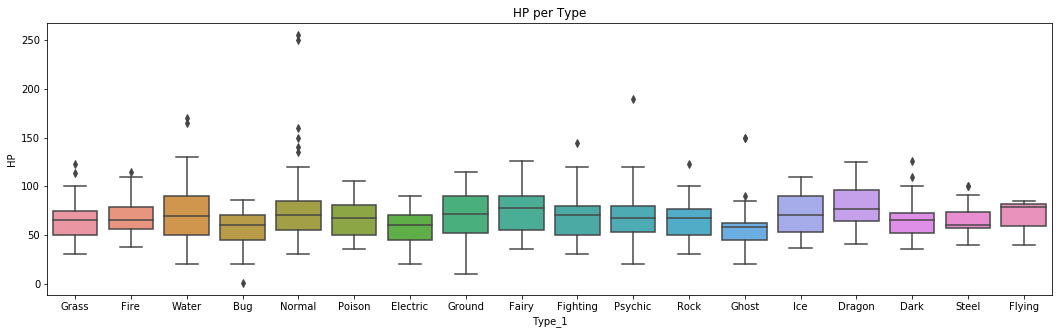

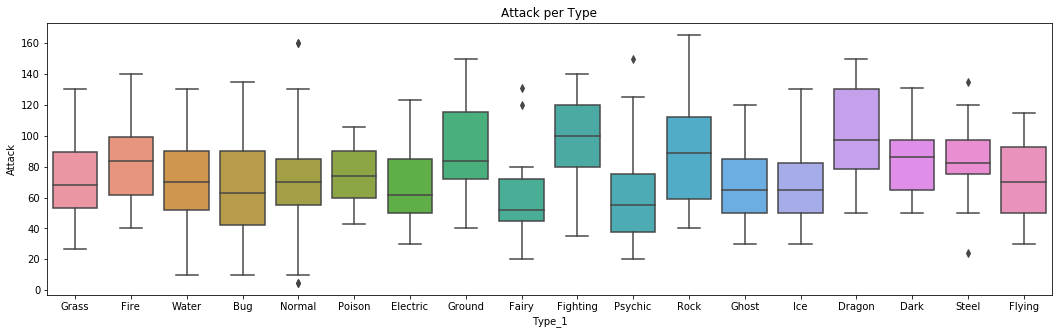

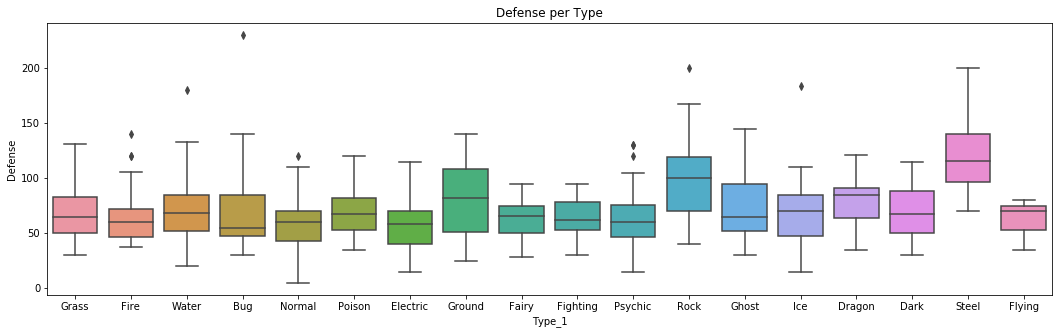

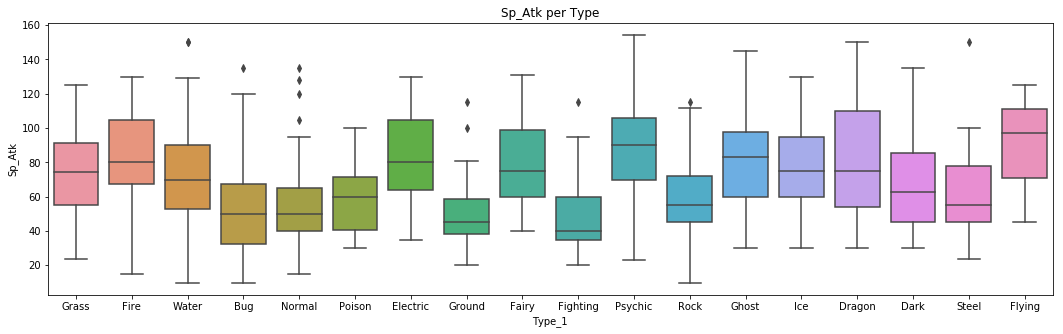

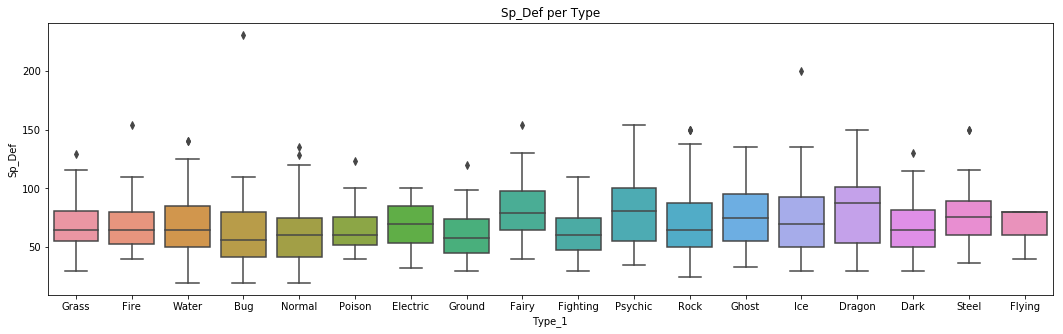

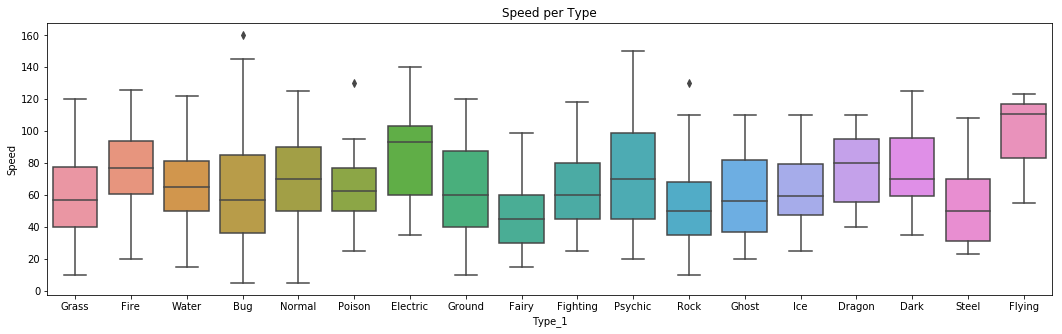

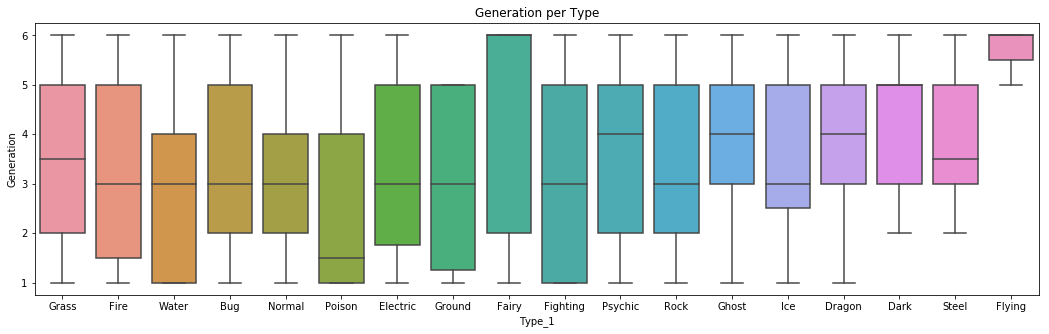

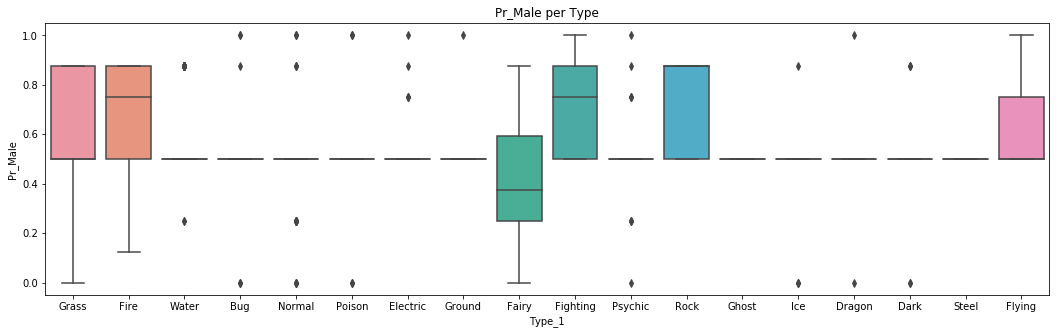

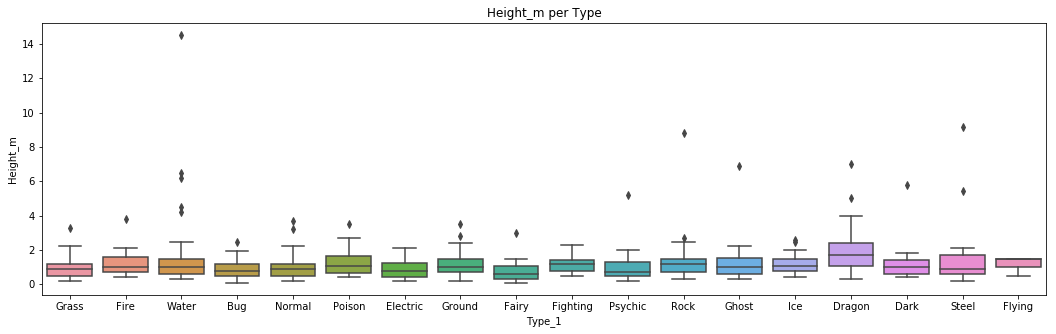

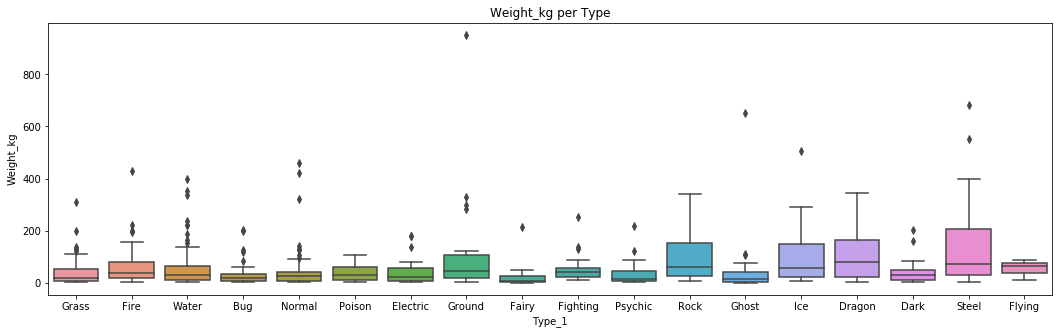

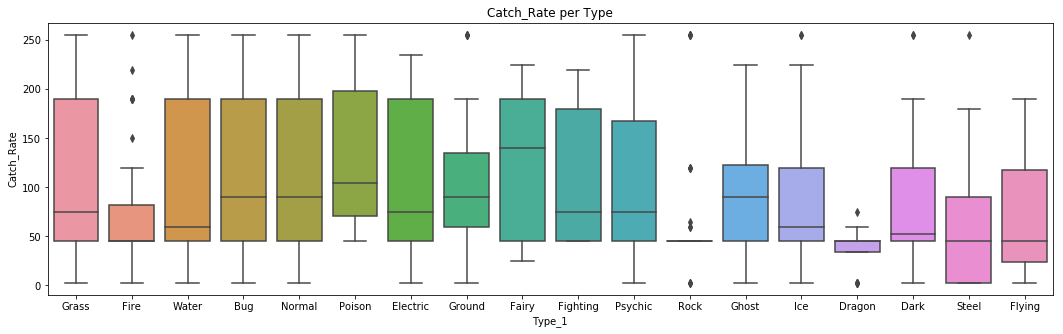

In [8]:
for val in [ "HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Generation", "Pr_Male", "Height_m", "Weight_kg", "Catch_Rate", ]:
    plt.subplots(figsize = (18,5))
    sns.boxplot(x="Type_1", y=val, data=df).set_title(val + " per Type")

# Identify if the model is a good model and why. ( 3pts )

The model is a fairly good model if it were classifying fire types, however, with only a 70% accuracy, it does not get all of its predicted fire types right. It's a good model for general prediction, but it cannot always be reliable. 

Answer before the i added the `class_weight="balanced"`: The model isn't a good model because it was not able to predict at any of the fire types correctly. While it had a 93% accuracy of guessing if any Pokemon is a fire type, it was able to guess 0% of the fire types correctly. 

# Bonus 1 : What is the difference between machine learning and pattern recognition? (1pt)

Machine Learning is a subset of Pattern Recognition. Pattern Recognition is the general scope of using methods in mathematics to find structure in data. Machine Learning is a direct application of Pattern Recognition to learn the ins-and-outs of sets of data to extrapolate future patterns in data.

# Bonus 2:  Who is your favorite Pokemon?

Eevee
